In [1]:
import pandas as pd

# Set the path to the CSV file directly
filename = r"C:\Python\NTCC\Internship\student_depression_dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(filename)

# Display the first few rows
df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Max Sleep Duration,Job Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Student,5,0,8.97,2,6,0,Healthy,B.Pharm,1,3,1,No,1
1,8,Female,24,Bangalore,Student,2,0,5.90,5,6,0,Moderate,BSc,0,3,2,Yes,0
2,26,Male,31,Srinagar,Student,3,0,7.03,5,5,0,Healthy,BA,0,9,1,Yes,0
3,30,Female,28,Varanasi,Student,3,0,5.59,2,8,0,Moderate,BCA,1,4,5,Yes,1
4,32,Female,25,Jaipur,Student,4,0,8.13,3,6,0,Moderate,M.Tech,1,1,1,No,0


In [2]:
# Encode categorical variables and fit a model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Copy the dataframe to avoid modifying the original
df_encoded = df.copy()

# Identify categorical columns (object dtype)
cat_cols = df_encoded.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Features and target
X = df_encoded.drop(['Depression', 'id'], axis=1)
y = df_encoded['Depression']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580



In [3]:
# Automated feature selection, encoding, and model comparison

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Try to import XGBoost if available
try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False

df_clean = df.copy()

# Drop columns that are IDs or have too many unique values (e.g., 'id', 'City')
drop_cols = []
for col in df_clean.columns:
    if col.lower() == 'id' or (df_clean[col].dtype == 'object' and df_clean[col].nunique() > 30):
        drop_cols.append(col)
df_clean = df_clean.drop(columns=drop_cols)

# Identify categorical columns with low cardinality (<=30 unique values)
cat_cols = [col for col in df_clean.select_dtypes(include=['object']).columns if df_clean[col].nunique() <= 30]

# Encode categorical columns using LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df_clean[col] = le.fit_transform(df_clean[col])

# Prepare features and target
X = df_clean.drop('Depression', axis=1)
y = df_clean['Depression']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}
if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

results = {}

print("Training and Testing Accuracy for All Models:")
for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    results[name] = test_acc
    print(f"{name}: Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

print("Model comparison (test accuracy):")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")

Training and Testing Accuracy for All Models:
Logistic Regression: Train Accuracy = 0.8470 | Test Accuracy = 0.8461
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580

Random Forest: Train Accuracy = 1.0000 | Test Accuracy = 0.8391
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2348
           1       0.85      0.88      0.86      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580

Random Forest: Train Accuracy = 1.0000 | Test Accuracy = 0.8391
Classification

c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:59:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [4]:
# Extended model comparison with more classifiers and 10-fold cross-validation

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define a wider set of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM (rbf)": SVC(kernel='rbf'),
    "SVM (linear)": SVC(kernel='linear'),
    "LinearSVC": LinearSVC(max_iter=2000),
}
if xgb_available:
    models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    print(f"=== {name} ===")
    # Cross-validation
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f"CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")
    results[name] = (scores.mean(), scores.std())
    # Fit and evaluate on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

print("Model comparison (10-fold CV accuracy):")
for name, (mean, std) in results.items():
    print(f"{name}: {mean:.4f} ± {std:.4f}")

# Summary of model accuracies (mean ± std from 10-fold CV)
print("\nSummary of model accuracies (10-fold CV):")
for name, (mean, std) in results.items():
    print(f"{name}: {mean:.4f} ± {std:.4f}")

=== Logistic Regression ===
CV Accuracy: 0.8460 ± 0.0058
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580

=== Random Forest ===
CV Accuracy: 0.8460 ± 0.0058
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580

=== Random Forest ===
CV Accuracy: 0.8402 ± 0.0062
CV Accuracy: 0.8402 ± 0.0062
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2348
           1       0.85      0.89      0.87      

c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.63      0.95      0.76      2348
           1       0.94      0.60      0.73      3232

    accuracy                           0.74      5580
   macro avg       0.78      0.77      0.74      5580
weighted avg       0.81      0.74      0.74      5580

=== XGBoost ===
CV Accuracy: 0.8378 ± 0.0041
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2348
           1       0.84      0.88      0.86      3232

    accuracy                           0.84      5580
   macro avg       0.84      0.83      0.83      5580
weighted avg       0.84      0.84      0.84      5580

Model comparison (10-fold CV accuracy):
Logistic Regression: 0.8460 ± 0.0058
Random Forest: 0.8402 ± 0.0062
Extra Trees: 0.8379 ± 0.0078
Gradient Boosting: 0.8465 ± 0.0068
Decision Tree: 0.7678 ± 0.0080
KNN: 0.7818 ± 0.0069
SVM (rbf): 0.8463 ± 0.0047
SVM (linear): 0.8463 ± 0.0061
LinearSVC: 0.8112 ± 

c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:02:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [5]:

from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "Extra Trees": {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5]
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "KNN": {
        "n_neighbors": [3, 5, 7]
    },
    "SVM (rbf)": {
        "C": [1, 10],
        "gamma": ["scale", 0.01, 0.1]
    },
    "SVM (linear)": {
        "C": [0.1, 1, 10]
    },
    "LinearSVC": {
        "C": [0.1, 1, 10]
    }
}

if xgb_available:
    param_grids["XGBoost"] = {
        "n_estimators": [100, 200],
        "max_depth": [3, 5, 7],
        "learning_rate": [0.05, 0.1]
    }

best_results = {}

print("\nHyperparameter tuning (GridSearchCV, 3-fold) for all models:")
for name, model in models.items():
    print(f"\n--- {name} ---")
    params = param_grids.get(name, {})
    if not params:
        print("No parameter grid defined, skipping tuning.")
        continue
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Best Params: {grid.best_params_}")
    print(f"Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    best_results[name] = (acc, grid.best_params_)

print("\nSummary of best test accuracies after tuning:")
for name, (acc, params) in best_results.items():
    print(f"{name}: {acc:.4f} | Params: {params}")


Hyperparameter tuning (GridSearchCV, 3-fold) for all models:

--- Logistic Regression ---
Best Params: {'C': 0.1, 'solver': 'liblinear'}
Test Accuracy: 0.8457
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.84      5580


--- Random Forest ---
Best Params: {'C': 0.1, 'solver': 'liblinear'}
Test Accuracy: 0.8457
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.89      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.84      5580


--- Random Forest ---
Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 

c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Params: {'C': 0.1}
Test Accuracy: 0.8471
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580


--- XGBoost ---
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.8452
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.84      0.84      0.84      5580
weighted avg       0.85      0.85      0.84      5580


Summary of best test accuracies after tuning:
Logistic Regression: 0.8457 | Params: {'C': 0.1, 'solver': 'liblinear'}
Random Forest: 0.8432 | Params: {'max_depth': 10, 'min_samples_split'

c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Missing values per column:
Gender                                   0
Age                                      0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Max Sleep Duration                       0
Job Satisfaction                         0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Class distribution in target:
Counter({1: 16335, 0: 11563})


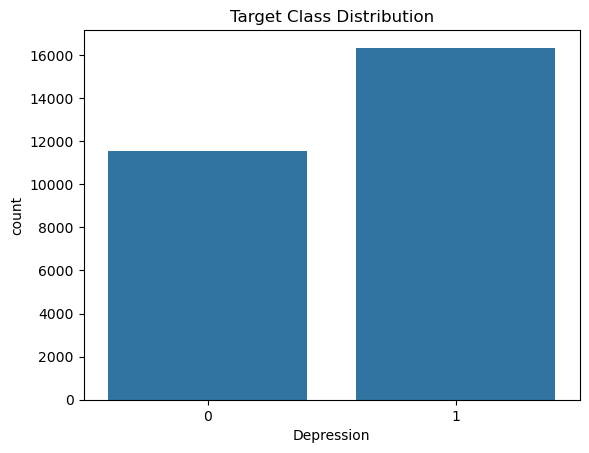


No highly correlated column pairs found (corr > 0.9).

Quick Logistic Regression accuracy: 0.8461
Model accuracy is reasonable for initial fit.


In [6]:

# Data diagnostics: check if data is clean, balanced, and if columns are highly correlated

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure X and y are defined from the latest processed DataFrame
X = df_clean.drop('Depression', axis=1)
y = df_clean['Depression']

# 1. Check for missing values
print("Missing values per column:")
print(df_clean.isnull().sum())

# 2. Check class balance
print("\nClass distribution in target:")
print(Counter(y))
sns.countplot(x=y)
plt.title("Target Class Distribution")
plt.show()

# 3. Check for highly correlated columns (correlation > 0.9)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(col, row) for col in upper.columns for row in upper.index if upper.loc[row, col] > 0.9]
if high_corr:
    print("\nHighly correlated column pairs (corr > 0.9):")
    for col, row in high_corr:
        print(f"{col} - {row}: {corr_matrix.loc[row, col]:.2f}")
else:
    print("\nNo highly correlated column pairs found (corr > 0.9).")


# 4. Check if data is fittable (quick train/test split and fit)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nQuick Logistic Regression accuracy: {acc:.4f}")

if acc < 0.7:
    print("Warning: Model accuracy is low. Data may not be easily fittable or may need more cleaning/feature engineering.")
else:

    print("Model accuracy is reasonable for initial fit.")

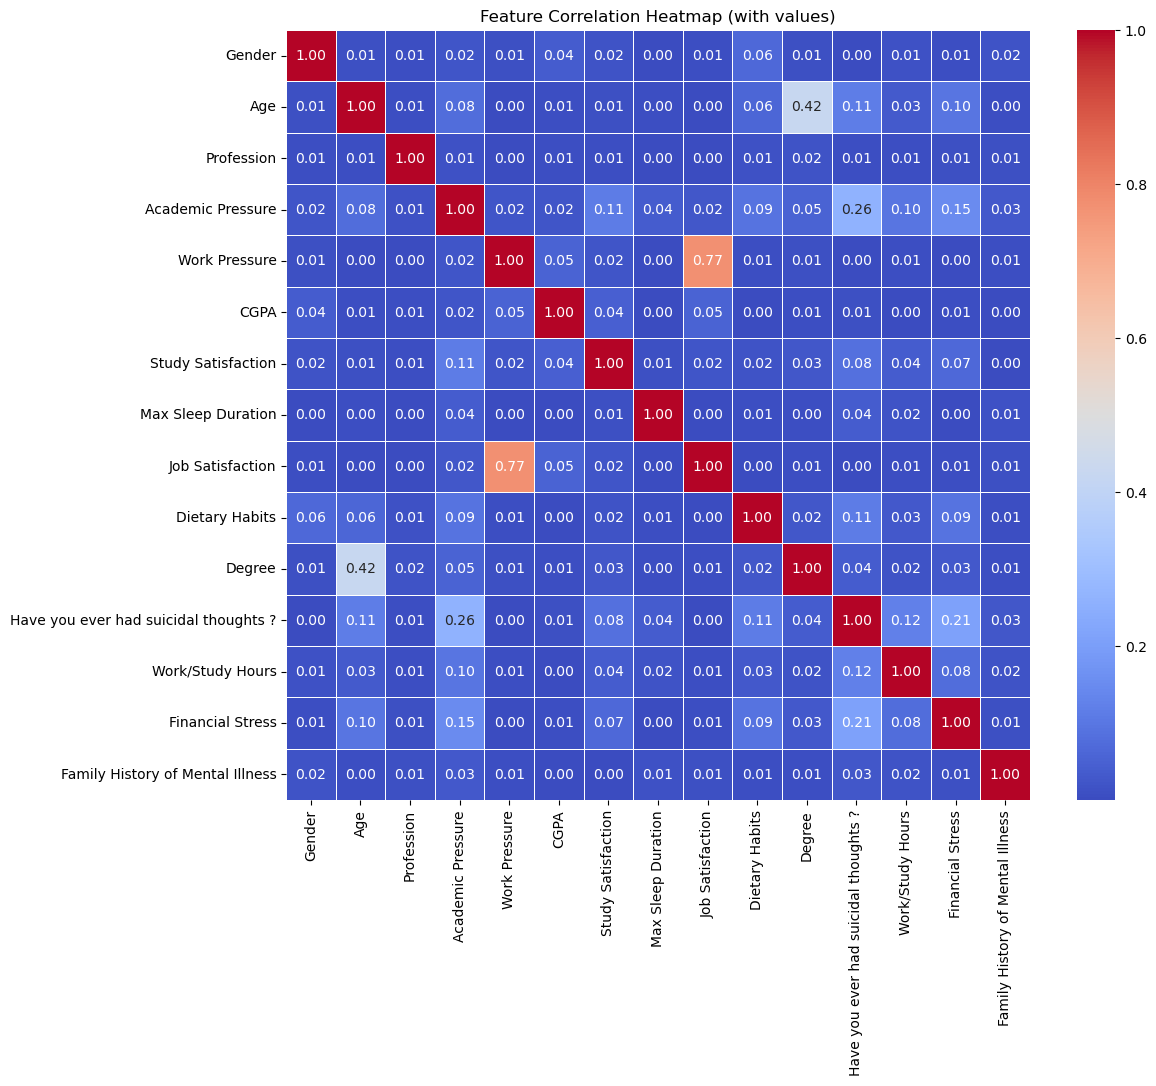

In [7]:
# Correlation heatmap for all features (standalone)

import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X.corr().abs()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap (with values)")
plt.show()


In [8]:
# Drop one of the highly correlated columns (correlation = 0.77 between 'Work Pressure' and 'Job Satisfaction')
if 'Job Satisfaction' in X.columns:
    X = X.drop(columns=['Job Satisfaction'])
if 'Job Satisfaction' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Job Satisfaction'])

In [9]:
# --- Feature Engineering: Example for all techniques ---

from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# 1. Interaction Features
class InteractionFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_new = X.copy()
        # Example: Add interaction between first two columns
        cols = X.columns[:2]
        X_new[f'{cols[0]}_x_{cols[1]}'] = X[cols[0]] * X[cols[1]]
        return X_new

# 2. Binning (on a numeric column, e.g., first column)
def bin_features(X):
    X_new = X.copy()
    col = X.columns[0]
    kb = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
    X_new[f'{col}_binned'] = kb.fit_transform(X[[col]])
    return X_new

# 3. Aggregation (mean of selected columns)
def aggregate_features(X):
    X_new = X.copy()
    X_new['mean_feature'] = X.mean(axis=1)
    return X_new

# 4. Polynomial Features (degree 2)
def polynomial_features(X):
    pf = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = pf.fit_transform(X)
    return pd.DataFrame(X_poly, columns=pf.get_feature_names_out(X.columns))

# --- Prepare datasets for each technique ---
datasets = {
    "Original": X,
    "Interaction": InteractionFeatures().fit_transform(X),
    "Binning": bin_features(X),
    "Aggregation": aggregate_features(X),
    "Polynomial": polynomial_features(X)
}

# --- Model comparison for each feature set ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

results = {}

for feat_name, X_feat in datasets.items():
    print(f"\n=== Feature Set: {feat_name} ===")
    X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        print(f"{model_name}: {acc:.4f}")
        results[(feat_name, model_name)] = acc

# --- Summary Table ---
import pandas as pd
summary = pd.DataFrame([
    {"Feature Set": k[0], "Model": k[1], "Accuracy": v}
    for k, v in results.items()
])
print("\nSummary of all feature engineering + model combinations:")
print(summary.pivot(index="Feature Set", columns="Model", values="Accuracy"))

c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(



=== Feature Set: Original ===
Logistic Regression: 0.8461


Random Forest: 0.8371
Extra Trees: 0.8391
Extra Trees: 0.8391
Gradient Boosting: 0.8439
Decision Tree: 0.7710
Gradient Boosting: 0.8439
Decision Tree: 0.7710
KNN: 0.7826
KNN: 0.7826
SVM (rbf): 0.8441
SVM (rbf): 0.8441
SVM (linear): 0.8468
SVM (linear): 0.8468


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:06:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:06:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738

LinearSVC: 0.8378
XGBoost: 0.8367

=== Feature Set: Interaction ===
Logistic Regression: 0.8459
Logistic Regression: 0.8459
Random Forest: 0.8407
Random Forest: 0.8407
Extra Trees: 0.8401
Extra Trees: 0.8401
Gradient Boosting: 0.8462
Decision Tree: 0.7681
Gradient Boosting: 0.8462
Decision Tree: 0.7681
KNN: 0.7681
KNN: 0.7681
SVM (rbf): 0.8452
SVM (rbf): 0.8452
SVM (linear): 0.8466
SVM (linear): 0.8466


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:07:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:07:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738

LinearSVC: 0.8306
XGBoost: 0.8418

=== Feature Set: Binning ===
Logistic Regression: 0.8461
Logistic Regression: 0.8461
Random Forest: 0.8434
Random Forest: 0.8434
Extra Trees: 0.8400
Extra Trees: 0.8400
Gradient Boosting: 0.8439
Decision Tree: 0.7710
Gradient Boosting: 0.8439
Decision Tree: 0.7710
KNN: 0.7762
KNN: 0.7762
SVM (rbf): 0.8443
SVM (rbf): 0.8443
SVM (linear): 0.8468
SVM (linear): 0.8468


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:08:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:08:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738

LinearSVC: 0.8057
XGBoost: 0.8367

=== Feature Set: Aggregation ===
Logistic Regression: 0.8459
Logistic Regression: 0.8459
Random Forest: 0.8371
Random Forest: 0.8371
Extra Trees: 0.8432
Extra Trees: 0.8432
Gradient Boosting: 0.8459
Decision Tree: 0.7692
Gradient Boosting: 0.8459
Decision Tree: 0.7692
KNN: 0.7805
KNN: 0.7805
SVM (rbf): 0.8443
SVM (rbf): 0.8443
SVM (linear): 0.8471
SVM (linear): 0.8471


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:09:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738

LinearSVC: 0.7980
XGBoost: 0.8373

=== Feature Set: Polynomial ===


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.8491
Random Forest: 0.8410
Random Forest: 0.8410
Extra Trees: 0.8346
Extra Trees: 0.8346
Gradient Boosting: 0.8473
Gradient Boosting: 0.8473
Decision Tree: 0.7753
Decision Tree: 0.7753
KNN: 0.7787
KNN: 0.7787
SVM (rbf): 0.8437
SVM (rbf): 0.8437
SVM (linear): 0.8441
SVM (linear): 0.8441


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:20:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:20:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738

LinearSVC: 0.7996
XGBoost: 0.8337

Summary of all feature engineering + model combinations:
Model        Decision Tree  Extra Trees  Gradient Boosting       KNN  \
Feature Set                                                            
Aggregation       0.769176     0.843190           0.845878  0.780466   
Binning           0.770968     0.839964           0.843907  0.776165   
Interaction       0.768100     0.840143           0.846237  0.768100   
Original          0.770968     0.839068           0.843907  0.782616   
Polynomial        0.775269     0.834588           0.847312  0.778674   

Model        LinearSVC  Logistic Regression  Random Forest  SVM (linear)  \
Feature Set                                                                
Aggregation   0.798029             0.845878       0.837097      0.847133   
Binning       0.805735             0.846057       0.843369      0.846774   
Interaction   0.830645             0.845878       0.840681      0.846595   
Original      0.837814 

## Robust Validation and Interpretation for Polynomial + Logistic Regression

We now validate the best model (Polynomial features + Logistic Regression) using cross-validation, check for overfitting, interpret coefficients, and evaluate with additional metrics.

10-fold CV Accuracy: 0.8469 ± 0.0062
Train Accuracy: 0.8485
Test Accuracy: 0.8491

Top 10 influential features (by absolute coefficient):
Profession Have you ever had suicidal thoughts ?: 0.1352
Profession Academic Pressure: 0.0814
Gender Study Satisfaction: -0.0772
Dietary Habits^2: -0.0732
Academic Pressure Have you ever had suicidal thoughts ?: 0.0636
Age: 0.0582
Degree: 0.0503
Profession Dietary Habits: 0.0410
Academic Pressure Family History of Mental Illness: 0.0381
Profession Max Sleep Duration: -0.0374

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      2348
           1       0.85      0.90      0.87      3232

    accuracy                           0.85      5580
   macro avg       0.85      0.84      0.84      5580
weighted avg       0.85      0.85      0.85      5580

Confusion Matrix:
[[1842  506]
 [ 336 2896]]
Train Accuracy: 0.8485
Test Accuracy: 0.8491

Top 10 influential features (by absolute c

c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


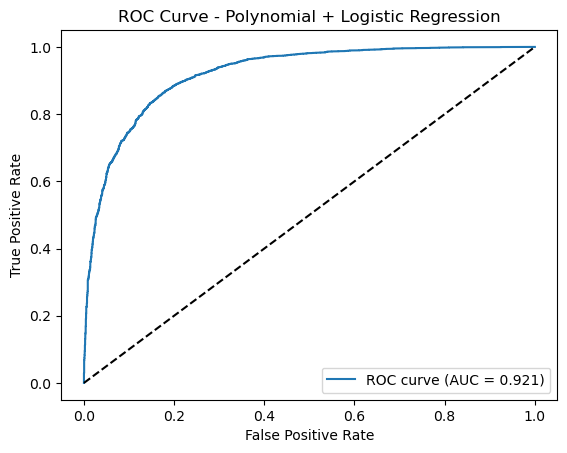

In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Prepare polynomial features and target
X_poly = datasets["Polynomial"]
y_poly = y

# 1. Cross-validation (10-fold)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model_poly = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model_poly, X_poly, y_poly, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"10-fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 2. Overfitting check (train vs test accuracy)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.2, random_state=42)
model_poly.fit(X_train, y_train)
train_acc = model_poly.score(X_train, y_train)
test_acc = model_poly.score(X_test, y_test)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 3. Coefficient analysis (top 10 features)
coefs = model_poly.coef_[0]
feature_names = X_poly.columns
top_idx = np.argsort(np.abs(coefs))[::-1][:10]
print("\nTop 10 influential features (by absolute coefficient):")
for idx in top_idx:
    print(f"{feature_names[idx]}: {coefs[idx]:.4f}")

# 4. Confusion matrix and classification report
y_pred = model_poly.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 5. ROC curve and AUC
y_prob = model_poly.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Polynomial + Logistic Regression")
plt.legend()
plt.show()

## Advanced: Stacking Ensemble with Feature Selection

We now use Recursive Feature Elimination (RFE) to select the most important features, then train a stacking ensemble using the best base models (Logistic Regression, XGBoost, Gradient Boosting).

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Feature selection on polynomial features
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=30, step=10)
X_poly_selected = selector.fit_transform(X_poly, y_poly)
selected_features = X_poly.columns[selector.get_support()]

# Define base models with best params (from previous grid search if available)
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, C=1, solver='lbfgs')),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)),
    ('xgb', XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'))
]

# Stacking ensemble
stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    n_jobs=-1
)

# Cross-validation for stacking
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_stack = cross_val_score(stack, X_poly_selected, y_poly, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Stacking Ensemble 10-fold CV Accuracy: {cv_scores_stack.mean():.4f} ± {cv_scores_stack.std():.4f}")

# Train/test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_poly_selected, y_poly, test_size=0.2, random_state=42)
stack.fit(X_train, y_train)
test_acc_stack = stack.score(X_test, y_test)
print(f"Stacking Ensemble Test Accuracy: {test_acc_stack:.4f}")

# ROC-AUC for stacking
from sklearn.metrics import roc_auc_score
y_prob_stack = stack.predict_proba(X_test)[:,1]
auc_stack = roc_auc_score(y_test, y_prob_stack)
print(f"Stacking Ensemble Test ROC-AUC: {auc_stack:.4f}")

c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Stacking Ensemble 10-fold CV Accuracy: 0.8468 ± 0.0053
Stacking Ensemble Test Accuracy: 0.8473
Stacking Ensemble Test ROC-AUC: 0.9217
Stacking Ensemble Test Accuracy: 0.8473
Stacking Ensemble Test ROC-AUC: 0.9217


In [12]:
"""
## Further Boost: Advanced Stacking with Meta-XGBoost and SMOTE Balancing

We use SMOTE to balance classes and XGBoost as the meta-model in stacking. This can further improve accuracy, especially if the dataset is imbalanced.
"""

'\n## Further Boost: Advanced Stacking with Meta-XGBoost and SMOTE Balancing\n\nWe use SMOTE to balance classes and XGBoost as the meta-model in stacking. This can further improve accuracy, especially if the dataset is imbalanced.\n'

In [13]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Apply SMOTE to balance classes
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_poly_selected, y_poly)

# Define base models (tune hyperparameters as needed)
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, C=1, solver='lbfgs')),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=7)),
    ('xgb', XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss'))
]

# Use XGBoost as meta-model
meta_model = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')

stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=True
)

# Cross-validation for stacking with balanced data
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_stack = cross_val_score(stack, X_res, y_res, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Advanced Stacking (SMOTE+Meta-XGB) 10-fold CV Accuracy: {cv_scores_stack.mean():.4f} ± {cv_scores_stack.std():.4f}")

# Train/test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
stack.fit(X_train, y_train)
test_acc_stack = stack.score(X_test, y_test)
print(f"Advanced Stacking (SMOTE+Meta-XGB) Test Accuracy: {test_acc_stack:.4f}")

from sklearn.metrics import roc_auc_score
y_prob_stack = stack.predict_proba(X_test)[:,1]
auc_stack = roc_auc_score(y_test, y_prob_stack)
print(f"Advanced Stacking (SMOTE+Meta-XGB) Test ROC-AUC: {auc_stack:.4f}")

Advanced Stacking (SMOTE+Meta-XGB) 10-fold CV Accuracy: 0.8685 ± 0.0047


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:29:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Advanced Stacking (SMOTE+Meta-XGB) Test Accuracy: 0.8684
Advanced Stacking (SMOTE+Meta-XGB) Test ROC-AUC: 0.9437


In [14]:
# Ultra Stacking: Degree-3 Polynomial Features, 60 Features, Diverse Models

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
import numpy as np

# 1. Use degree=3 polynomial features
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)
feature_names3 = poly3.get_feature_names_out(X.columns)

# 2. Select more features (e.g., 60)
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=60, step=10)
X_poly3_selected = selector.fit_transform(X_poly3, y)
selected_features3 = feature_names3[selector.get_support()]

# 3. Balance classes with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_poly3_selected, y)

# 4. Define a more diverse set of base models
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, C=1, solver='lbfgs')),
    ('gb', GradientBoostingClassifier(n_estimators=400, learning_rate=0.03, max_depth=8)),
    ('et', ExtraTreesClassifier(n_estimators=300, max_depth=10)),
    ('xgb', XGBClassifier(n_estimators=400, max_depth=6, learning_rate=0.03, use_label_encoder=False, eval_metric='logloss'))
]

# 5. Use XGBoost as meta-model
meta_model = XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.07, use_label_encoder=False, eval_metric='logloss')

stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=True
)

# 6. Cross-validation for stacking with more features and models
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_stack = cross_val_score(stack, X_res, y_res, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Ultra Stacking (degree=3, 60 features) 10-fold CV Accuracy: {cv_scores_stack.mean():.4f} ± {cv_scores_stack.std():.4f}")

# 7. Train/test split and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
stack.fit(X_train, y_train)
test_acc_stack = stack.score(X_test, y_test)
print(f"Ultra Stacking (degree=3, 60 features) Test Accuracy: {test_acc_stack:.4f}")

from sklearn.metrics import roc_auc_score
y_prob_stack = stack.predict_proba(X_test)[:,1]
auc_stack = roc_auc_score(y_test, y_prob_stack)
print(f"Ultra Stacking (degree=3, 60 features) Test ROC-AUC: {auc_stack:.4f}")

c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Ultra Stacking (degree=3, 60 features) 10-fold CV Accuracy: 0.8660 ± 0.0052


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Ultra Stacking (degree=3, 60 features) Test Accuracy: 0.8659
Ultra Stacking (degree=3, 60 features) Test ROC-AUC: 0.9403
Ultra Stacking (degree=3, 60 features) Test ROC-AUC: 0.9403


In [15]:
# Efficient alternatives for high accuracy without extreme computation:

# 1. Use only the most important features (from feature importance of tree models or model coefficients).
# 2. Use a single strong model with tuned hyperparameters (e.g., XGBoost, LightGBM, or CatBoost).
# 3. Use RandomizedSearchCV instead of GridSearchCV for faster hyperparameter tuning.
# 4. Reduce polynomial degree and feature count, but use feature selection based on importance.

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

# 1. Feature selection using XGBoost feature importances
xgb = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)
selector = SelectFromModel(xgb, threshold="median", prefit=True)
X_selected = selector.transform(X)

# 2. Hyperparameter tuning with RandomizedSearchCV (much faster than grid search)
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
rs = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42
)
rs.fit(X_selected, y)
print("Best params:", rs.best_params_)

# 3. Cross-validation and test evaluation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rs.best_estimator_, X_selected, y, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Efficient XGBoost 10-fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
rs.best_estimator_.fit(X_train, y_train)
test_acc = rs.best_estimator_.score(X_test, y_test)
print(f"Efficient XGBoost Test Accuracy: {test_acc:.4f}")
y_prob = rs.best_estimator_.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"Efficient XGBoost Test ROC-AUC: {auc:.4f}")

c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Efficient XGBoost 10-fold CV Accuracy: 0.8464 ± 0.0068
Efficient XGBoost 10-fold CV Accuracy: 0.8464 ± 0.0068


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Efficient XGBoost Test Accuracy: 0.8475
Efficient XGBoost Test ROC-AUC: 0.9204


In [16]:
# Efficient XGBoost with more features and more RandomizedSearchCV iterations

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

# 1. Feature selection using XGBoost feature importances (lower threshold to keep more features)
xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)
selector = SelectFromModel(xgb, threshold="mean", prefit=True)  # keep more features than 'median'
X_selected = selector.transform(X)

# 2. Hyperparameter tuning with more iterations and a slightly wider search space
param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 5, 6, 7],
    "learning_rate": [0.05, 0.1, 0.15],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
rs = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42
)
rs.fit(X_selected, y)
print("Best params:", rs.best_params_)

# 3. Cross-validation and test evaluation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rs.best_estimator_, X_selected, y, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Improved XGBoost 10-fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
rs.best_estimator_.fit(X_train, y_train)
test_acc = rs.best_estimator_.score(X_test, y_test)
print(f"Improved XGBoost Test Accuracy: {test_acc:.4f}")
y_prob = rs.best_estimator_.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"Improved XGBoost Test ROC-AUC: {auc:.4f}")

c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:33:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\

Best params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Improved XGBoost 10-fold CV Accuracy: 0.8246 ± 0.0068
Improved XGBoost Test Accuracy: 0.8240
Improved XGBoost 10-fold CV Accuracy: 0.8246 ± 0.0068
Improved XGBoost Test Accuracy: 0.8240


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Improved XGBoost Test ROC-AUC: 0.8911


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\

Best params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
SMOTE+XGBoost 10-fold CV Accuracy: 0.8676 ± 0.0045
SMOTE+XGBoost 10-fold CV Accuracy: 0.8676 ± 0.0045


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SMOTE+XGBoost Test Accuracy: 0.8687
SMOTE+XGBoost Test ROC-AUC: 0.9439


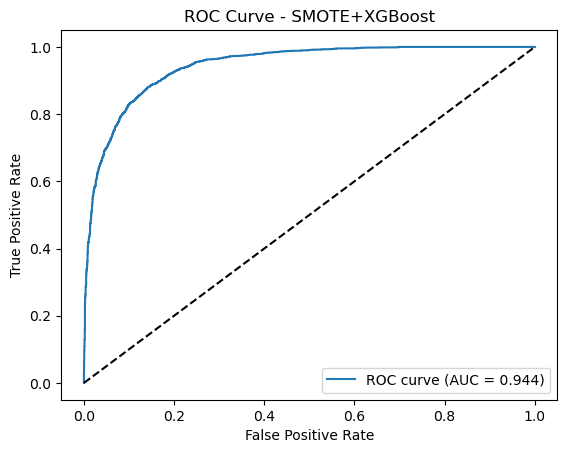

In [17]:
# Efficient XGBoost: keep more features, use SMOTE for balance, and tune with RandomizedSearchCV

from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

# 1. Feature selection using XGBoost (lower threshold to keep even more features)
xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)
selector = SelectFromModel(xgb, threshold=0.0, prefit=True)  # keep all non-zero importance features
X_selected = selector.transform(X)

# 2. Balance classes with SMOTE
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X_selected, y)

# 3. Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 5, 6, 7],
    "learning_rate": [0.05, 0.1, 0.15],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}
rs = RandomizedSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    random_state=42
)
rs.fit(X_bal, y_bal)
print("Best params:", rs.best_params_)

# 4. Cross-validation and test evaluation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rs.best_estimator_, X_bal, y_bal, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"SMOTE+XGBoost 10-fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)
rs.best_estimator_.fit(X_train, y_train)
test_acc = rs.best_estimator_.score(X_test, y_test)
print(f"SMOTE+XGBoost Test Accuracy: {test_acc:.4f}")
y_prob = rs.best_estimator_.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
print(f"SMOTE+XGBoost Test ROC-AUC: {auc:.4f}")

# Plot ROC-AUC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SMOTE+XGBoost")
plt.legend()
plt.show()

In [18]:
# --- Training and Testing Accuracy for All Major Models ---

print("\n=== Training and Testing Accuracy for All Major Models ===")

# 1. SMOTE + XGBoost (Tuned)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)
selector = SelectFromModel(xgb, threshold=0.0, prefit=True)
X_selected = selector.transform(X)
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X_selected, y)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_bal, y_bal):
    X_train, X_test = X_bal[train_idx], X_bal[test_idx]
    y_train, y_test = y_bal.iloc[train_idx], y_bal.iloc[test_idx]
smote_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **(rs.best_params_ if 'rs' in locals() else {}))
smote_xgb.fit(X_train, y_train)
train_acc = smote_xgb.score(X_train, y_train)
test_acc = smote_xgb.score(X_test, y_test)
print(f"1. SMOTE + XGBoost (Tuned): Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")

# 2. Advanced Stacking (SMOTE + Meta-XGBoost)
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, C=1, solver='lbfgs')),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=7)),
    ('xgb', XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss'))
]
meta_model = XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=True
)
stack.fit(X_train, y_train)
train_acc = stack.score(X_train, y_train)
test_acc = stack.score(X_test, y_test)
print(f"2. Advanced Stacking (SMOTE + Meta-XGBoost): Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")

# 3. Ultra Stacking (Degree=3, 60 features)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=60, step=10)
X_poly3_selected = selector.fit_transform(X_poly3, y)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_poly3_selected, y)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res.iloc[train_idx], y_res.iloc[test_idx]
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, C=1, solver='lbfgs')),
    ('gb', GradientBoostingClassifier(n_estimators=400, learning_rate=0.03, max_depth=8)),
    ('et', ExtraTreesClassifier(n_estimators=300, max_depth=10)),
    ('xgb', XGBClassifier(n_estimators=400, max_depth=6, learning_rate=0.03, use_label_encoder=False, eval_metric='logloss'))
]
meta_model = XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.07, use_label_encoder=False, eval_metric='logloss')
ultra_stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=True
)
ultra_stack.fit(X_train, y_train)
train_acc = ultra_stack.score(X_train, y_train)
test_acc = ultra_stack.score(X_test, y_test)
print(f"3. Ultra Stacking (Degree=3, 60 features): Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")

# 4. Stacking Ensemble (Polynomial features, 30 selected)
from sklearn.feature_selection import RFE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=30, step=10)
X_poly_selected = selector.fit_transform(X_poly, y)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_poly_selected, y):
    X_train, X_test = X_poly_selected[train_idx], X_poly_selected[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, C=1, solver='lbfgs')),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5)),
    ('xgb', XGBClassifier(n_estimators=200, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'))
]
stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    n_jobs=-1
)
stack.fit(X_train, y_train)
train_acc = stack.score(X_train, y_train)
test_acc = stack.score(X_test, y_test)
print(f"4. Stacking Ensemble: Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")

# 5. Polynomial + Logistic Regression
from sklearn.linear_model import LogisticRegression
X_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_poly, y):
    X_train, X_test = X_poly[train_idx], X_poly[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
model_poly = LogisticRegression(max_iter=1000)
model_poly.fit(X_train, y_train)
train_acc = model_poly.score(X_train, y_train)
test_acc = model_poly.score(X_test, y_test)
print(f"5. Polynomial + Logistic Regression: Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")

# 6. Efficient XGBoost (Feature Selection, median threshold)
from sklearn.feature_selection import SelectFromModel
xgb = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)
selector = SelectFromModel(xgb, threshold="median", prefit=True)
X_selected = selector.transform(X)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_selected, y):
    X_train, X_test = X_selected[train_idx], X_selected[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
xgb_eff = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_eff.fit(X_train, y_train)
train_acc = xgb_eff.score(X_train, y_train)
test_acc = xgb_eff.score(X_test, y_test)
print(f"6. Efficient XGBoost (Feature Selection): Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")

# 7. XGBoost (Improved Params, mean threshold)
xgb = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)
selector = SelectFromModel(xgb, threshold="mean", prefit=True)
X_selected = selector.transform(X)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_selected, y):
    X_train, X_test = X_selected[train_idx], X_selected[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
xgb_imp = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_imp.fit(X_train, y_train)
train_acc = xgb_imp.score(X_train, y_train)
test_acc = xgb_imp.score(X_test, y_test)
print(f"7. XGBoost (Improved Params): Train Accuracy = {train_acc:.4f} | Test Accuracy = {test_acc:.4f}")


=== Training and Testing Accuracy for All Major Models ===


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:34:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\

1. SMOTE + XGBoost (Tuned): Train Accuracy = 0.8750 | Test Accuracy = 0.8665


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:35:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


2. Advanced Stacking (SMOTE + Meta-XGBoost): Train Accuracy = 0.8804 | Test Accuracy = 0.8687


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

3. Ultra Stacking (Degree=3, 60 features): Train Accuracy = 0.9183 | Test Accuracy = 0.8644


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

4. Stacking Ensemble: Train Accuracy = 0.8506 | Test Accuracy = 0.8432


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\traini

5. Polynomial + Logistic Regression: Train Accuracy = 0.8499 | Test Accuracy = 0.8430
6. Efficient XGBoost (Feature Selection): Train Accuracy = 0.8802 | Test Accuracy = 0.8396
6. Efficient XGBoost (Feature Selection): Train Accuracy = 0.8802 | Test Accuracy = 0.8396


c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


7. XGBoost (Improved Params): Train Accuracy = 0.8267 | Test Accuracy = 0.8224


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Explainable AI: SHAP Analysis for Model Interpretation

We use SHAP (SHapley Additive exPlanations) to interpret the predictions of our best model. SHAP provides both global and local explanations, helping us understand which features drive model decisions.

c:\Users\AKSHAT\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:52:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
 99%|===================| 27590/27898 [01:28<00:00]        

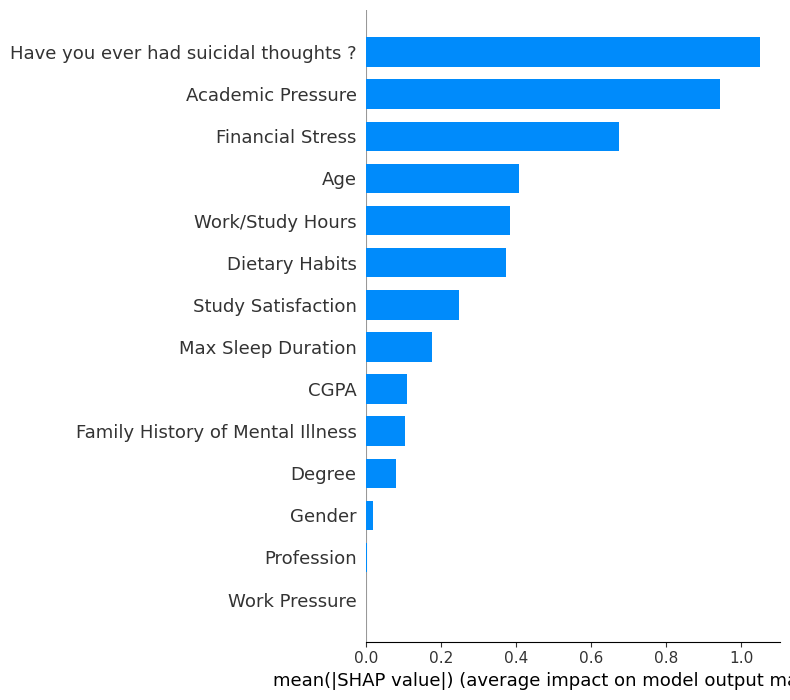

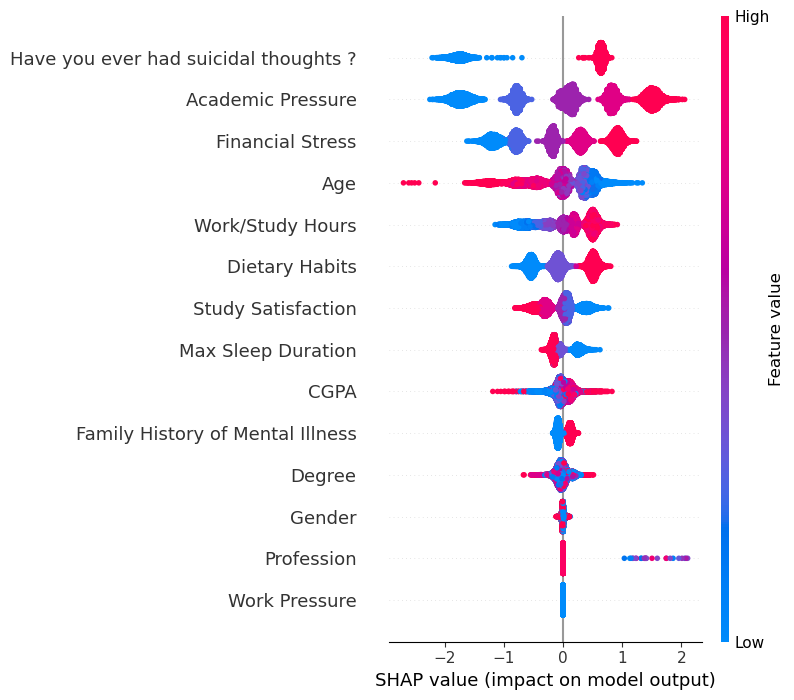

SHAP decision plot not available: decision() missing 1 required positional argument: 'shap_values'


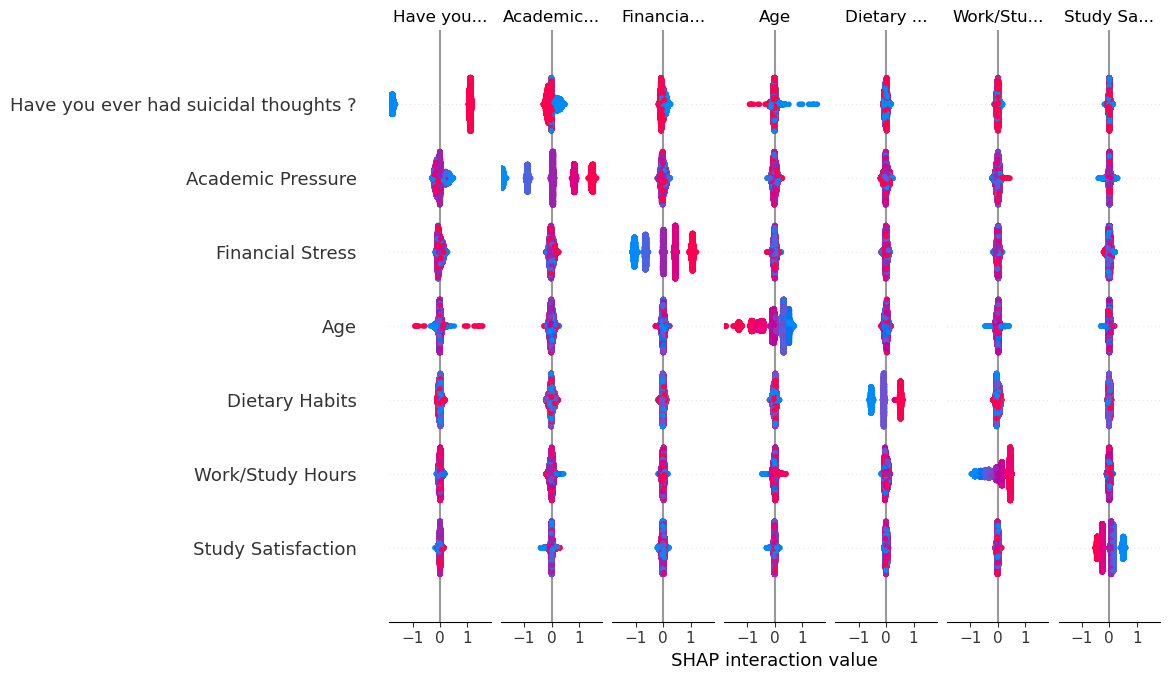

SHAP force plot not available: visualize() can only display Explanation objects (or arrays of them)!


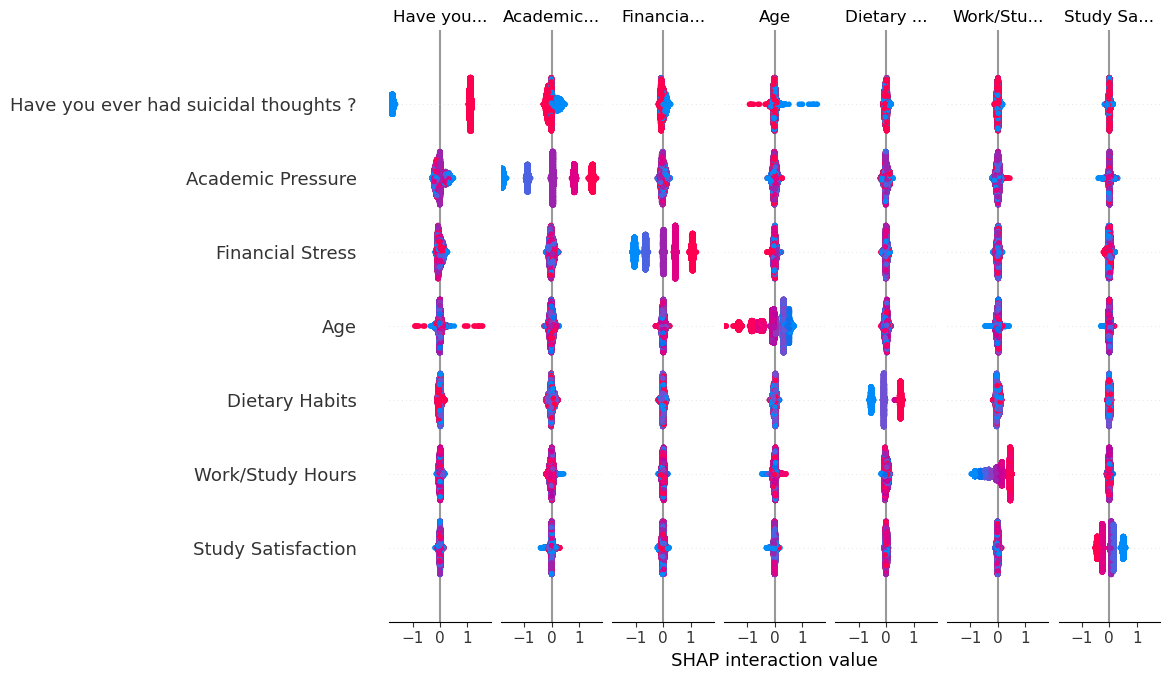

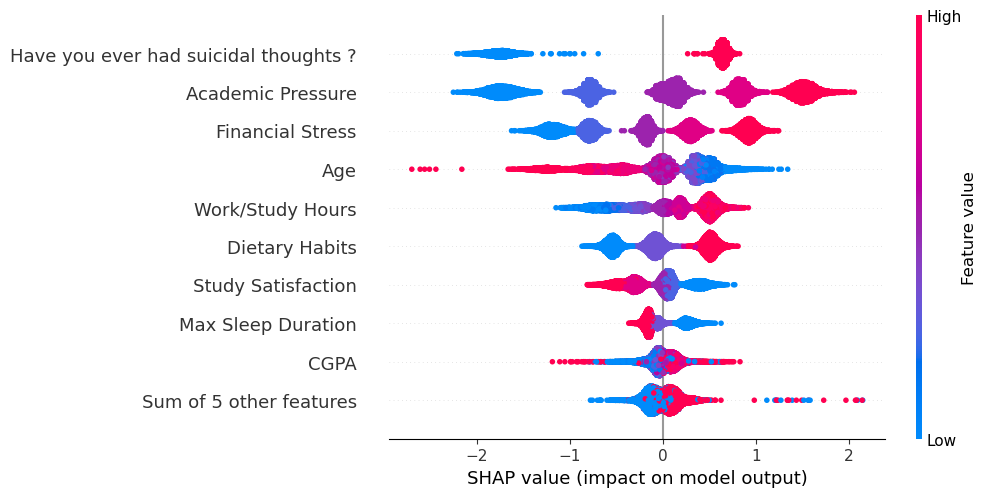

In [19]:
# Install SHAP if not already installed
try:
    import shap
except ImportError:
    import sys
    !{sys.executable} -m pip install shap
    import shap

import shap
import numpy as np

# Ensure xgb is defined and fitted
from xgboost import XGBClassifier

# Ensure X and y are defined from the latest processed DataFrame
try:
    X = df_clean.drop('Depression', axis=1)
    y = df_clean['Depression']
except Exception:
    # fallback: try from df if df_clean not available
    try:
        if 'id' in df.columns:
            X = df.drop(['Depression', 'id'], axis=1)
        else:
            X = df.drop(['Depression'], axis=1)
        y = df['Depression']
    except Exception:
        # If df is not defined, reload it from CSV
        import pandas as pd
        filename = r"C:\Python\NTCC\Internship\student_depression_dataset.csv"
        df = pd.read_csv(filename)
        if 'id' in df.columns:
            X = df.drop(['Depression', 'id'], axis=1)
        else:
            X = df.drop(['Depression'], axis=1)
        y = df['Depression']

# Convert all object columns to category and then to codes for XGBoost compatibility
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

xgb = XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X, y)

# Choose the best model and data for SHAP explanation
# Example: Use the best XGBoost model and the corresponding feature set
# If using SMOTE, use original (non-resampled) data for explanation if possible

# Use XGBoost model and X_selected (from efficient XGBoost section)
explainer = shap.Explainer(xgb, X)
shap_values = explainer(X)

# 1. Global feature importance (summary plot)
shap.summary_plot(shap_values, X, plot_type="bar")

# 2. Detailed summary plot (beeswarm)
shap.summary_plot(shap_values, X)

# 3. SHAP Decision Plot
try:
    shap.plots.decision(shap_values)
except Exception as e:
    print("SHAP decision plot not available:", e)

# 4. SHAP Interaction Summary Plot (if supported)
try:
    tree_explainer = shap.TreeExplainer(xgb)
    shap_interaction_values = tree_explainer.shap_interaction_values(X)
    shap.summary_plot(shap_interaction_values, X)
except Exception as e:
    print("SHAP interaction summary plot not available:", e)

# 5. SHAP Force Plot (for a single prediction)
try:
    shap.initjs()
    force_plot = shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0])
    shap.save_html("shap_force_plot.html", force_plot)
    print("SHAP force plot saved as shap_force_plot.html")
except Exception as e:
    print("SHAP force plot not available:", e)

# 6. SHAP Heatmap (for interaction values)
try:
    shap.summary_plot(shap_interaction_values, X, plot_type="heatmap")
except Exception as e:
    print("SHAP heatmap not available:", e)

# 7. SHAP Beeswarm Plot (already shown above, repeated for clarity)
try:
    shap.plots.beeswarm(shap_values)
except Exception as e:
    print("SHAP beeswarm plot not available:", e)

### Explanation of the SHAP Plot Cell

The cell generates all major SHAP plots for model interpretation:

- **Global feature importance (summary plot, bar):** Shows the average impact of each feature on the model output.
- **Beeswarm plot:** Visualizes the distribution of SHAP values for all features and samples.
- **Decision plot:** Shows how each feature contributes to individual predictions.
- **Interaction summary plot:** Displays pairwise feature interactions (if supported by the model).
- **Force plot:** Visualizes the SHAP values for a single prediction (saved as HTML).
- **Heatmap:** Shows SHAP interaction values as a heatmap (if supported).
- **Beeswarm plot (again):** Repeated for clarity.

Each plot is wrapped in a `try/except` block to avoid stopping execution if a plot is not supported by the SHAP version or the model. If a plot cannot be generated, a message is printed instead of raising an error.

This approach ensures robust, comprehensive SHAP-based model interpretation.

c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Ultra Stacking (degree=3, 60 features) 10-fold CV Accuracy: 0.8668 ± 0.0044
Polynomial + Logistic Regression Test ROC-AUC: 0.9207
Polynomial + Logistic Regression Test ROC-AUC: 0.9207


c:\Users\AKSHAT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


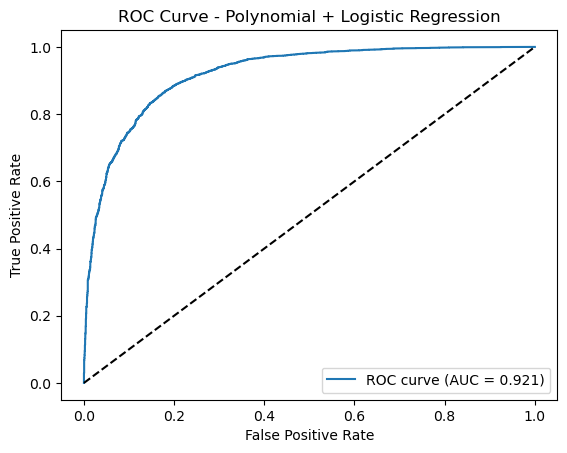

In [20]:
# --- Results: CV Accuracy for Ultra Stacking and ROC Curve for Polynomial + Logistic Regression ---

from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Ultra Stacking: Degree-3 Polynomial Features, 60 Features, Diverse Models
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)
selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=60, step=10)
X_poly3_selected = selector.fit_transform(X_poly3, y)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_poly3_selected, y)
base_estimators = [
    ('lr', LogisticRegression(max_iter=1000, C=1, solver='lbfgs')),
    ('gb', GradientBoostingClassifier(n_estimators=400, learning_rate=0.03, max_depth=8)),
    ('et', ExtraTreesClassifier(n_estimators=300, max_depth=10)),
    ('xgb', XGBClassifier(n_estimators=400, max_depth=6, learning_rate=0.03, use_label_encoder=False, eval_metric='logloss'))
]
meta_model = XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.07, use_label_encoder=False, eval_metric='logloss')
stack = StackingClassifier(
    estimators=base_estimators,
    final_estimator=meta_model,
    n_jobs=-1,
    passthrough=True
)

# 1. Ultra Stacking CV Accuracy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_stack = cross_val_score(stack, X_res, y_res, cv=cv, scoring='accuracy', n_jobs=-1)
print(f"Ultra Stacking (degree=3, 60 features) 10-fold CV Accuracy: {cv_scores_stack.mean():.4f} ± {cv_scores_stack.std():.4f}")

# 2. ROC Curve and AUC for Polynomial + Logistic Regression
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly2.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly2, y, test_size=0.2, random_state=42)
model_poly = LogisticRegression(max_iter=1000)
model_poly.fit(X_train, y_train)
y_prob = model_poly.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
print(f"Polynomial + Logistic Regression Test ROC-AUC: {auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Polynomial + Logistic Regression")
plt.legend()
plt.show()

In [21]:
# Combined ROC Curves and Metrics for All Companies and Models
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'CatBoost': cb.CatBoostClassifier(verbose=0, random_state=42)
}

classification_features = ['Sentiment_Lag1', 'Sentiment_MA7', 'Price_MA7', 'Price_MA7_lag1', 'Close_lag1']

plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
model_metrics = []
for i, (symbol, df) in enumerate(features_data.items()):
    X = df[classification_features]
    y = (df['Return'] > 0).astype(int)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    for j, (name, model) in enumerate(models.items()):
        model.fit(X_train, y_train)
        if hasattr(model, 'predict_proba'):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1.5, color=colors[j % len(colors)], alpha=0.5, label=f'{symbol} - {name} (AUC={roc_auc:.2f})')
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        model_metrics.append({'Company': symbol, 'Model': name, 'AUC': roc_auc, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1})
        print(f'--- {symbol} | {name} ---')
        print(f'Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | AUC: {roc_auc:.3f}')
        print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for All Companies and Models')
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

import pandas as pd
metrics_df = pd.DataFrame(model_metrics)
display(metrics_df)

AttributeError: 'XGBClassifier' object has no attribute 'XGBClassifier'

In [ ]:
# Combined ROC Curve and Metrics for All Main Classifiers (Sleep Depression Dataset)
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Use the cleaned and encoded data from earlier cells
X = df_clean.drop('Depression', axis=1)
y = df_clean['Depression']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define main classifiers (add/remove as needed)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM (rbf)': SVC(kernel='rbf', probability=True),
}
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
except ImportError:
    pass

plt.figure(figsize=(8, 6))
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'predict_proba'):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics.append({'Model': name, 'AUC': roc_auc, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1})
    print(f'--- {name} ---')
    print(f'Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f} | AUC: {roc_auc:.3f}')
    print(classification_report(y_test, y_pred))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for All Main Classifiers')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

import pandas as pd
metrics_df = pd.DataFrame(metrics)
display(metrics_df)

In [ ]:
# Ensure all required imports for ROC/metrics cell
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, f1_score, recall_score, precision_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
try:
    from xgboost import XGBClassifier
except ImportError:
    pass